In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.signal import find_peaks

# MODELO SIMPLIFICADO 2

## h + n = cte // m = inf_m

### Constantes

In [33]:
#Conductividades: se expresan en [mS/cm^2], pero tras normalizar la ecuación quedan adimensionales
g_Na = 120
g_K = 36 
g_Cl = 0.3


#Voltajes de inversion [mV]
V_Na = 50
V_K = -77
V_Cl = -54.4

#Capacitancia (C): se expresa en [uF/cm^2], pero tras normalizar la ecuación queda en [ms] y vale 1, por lo que ni se incluye en la ecuación

#Simplificación
cte = 0.8 #h+n

### Funciones

In [34]:
#Funciones auxiliares

def inf_x(a, b):
    '''
    Devuelve el valor para t = inf en función de los coeficientes a y b
    '''
    inf = a/(a+b)
    return inf

def tau_x(a, b):
    '''
    Devuelve el parámetro tau en función de los coeficientes a y b
    '''
    tau = 1/(a+b)
    return tau

#Ecuaciones diferenciales del modelo
def derivada(t, u, I):
    '''
    Recibe el parámetro I y los valores actuales del vector de variables u = (v, m, h, n)
    y devuelve la derivada de cada una de dichas variables
    '''
    v = u[0]
    n = u[1]

    
    #-------------------------------------
    #VARIABLES SIMPLIFICADAS
    
    #m
    a_m = 0.1*(v+40)/(1-np.exp((-v-40)/10))
    b_m = 4*np.exp((-v-65)/18)
    m = inf_x(a_m, b_m)

    h = cte - n

    #-------------------------------------
    #VARIABLES DE ECUACIONES DIFERENCIALES

    #v
    dv = I - g_Na*(m**3)*h*(v-V_Na) - g_K*(n**4)*(v-V_K) - g_Cl*(v-V_Cl)

    #n
    a_n = 0.01*(v+55)/(1-np.exp((-v-55)/10))
    b_n = 0.125*np.exp((-v-65)/80)
    inf_n = inf_x(a_n, b_n)
    tau_n = tau_x(a_n, b_n)
    dn = (inf_n - n)/tau_n

    du = [dv, dn]

    return du

### Valores iniciales (para el primer valor de corriente)

In [35]:
v0 = -60 #[mV]

a_h0 = 0.07*np.exp((-v0-65)/20)
b_h0 = 1/(1+np.exp((-v0-35)/10))
h0 = inf_x(a_h0, b_h0)

a_n0 = 0.01*(v0+55)/(1-np.exp((-v0-55)/10))
b_n0 = 0.125*np.exp((-v0-65)/80)
n0 = inf_x(a_n0, b_n0)

### Vector de corrientes externas a probar, vector de frecuencias obtenidas y tiempos de la simulación

In [36]:
#Valores de corriente externa a utilizar
K = 101 #Cantidad de pasos
I1 = np.linspace(0, 50, K) #[uA/cm^2]

#Frecuencias obtenidas ()
f1 = np.zeros(K)
f2 = np.zeros(K)

#Tiempos
t_ini = 0   #[ms]
t_fin = 100 #[ms]

### Solución numérica: corriente creciente

i = 0.0


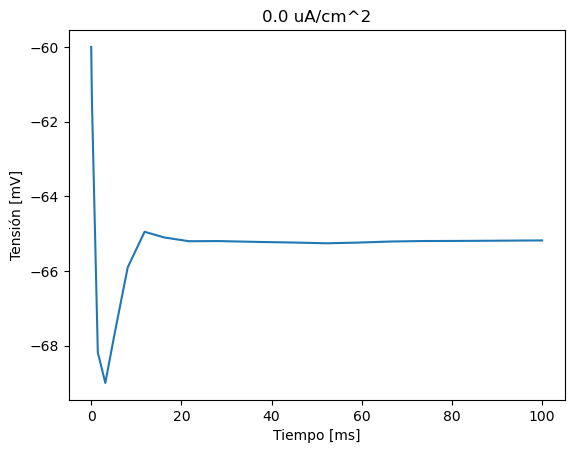

C:\Users\gatoa\AppData\Local\Temp\ipykernel_3496\3397119758.py:31: RuntimeWarning: overflow encountered in exp
  a_m = 0.1*(v+40)/(1-np.exp((-v-40)/10))
C:\Users\gatoa\AppData\Local\Temp\ipykernel_3496\3397119758.py:32: RuntimeWarning: overflow encountered in exp
  b_m = 4*np.exp((-v-65)/18)
C:\Users\gatoa\AppData\Local\Temp\ipykernel_3496\3397119758.py:44: RuntimeWarning: overflow encountered in exp
  a_n = 0.01*(v+55)/(1-np.exp((-v-55)/10))
C:\Users\gatoa\AppData\Local\Temp\ipykernel_3496\3397119758.py:45: RuntimeWarning: overflow encountered in exp
  b_n = 0.125*np.exp((-v-65)/80)
C:\Users\gatoa\AppData\Local\Temp\ipykernel_3496\3397119758.py:48: RuntimeWarning: divide by zero encountered in double_scalars
  dn = (inf_n - n)/tau_n


i = 10.0


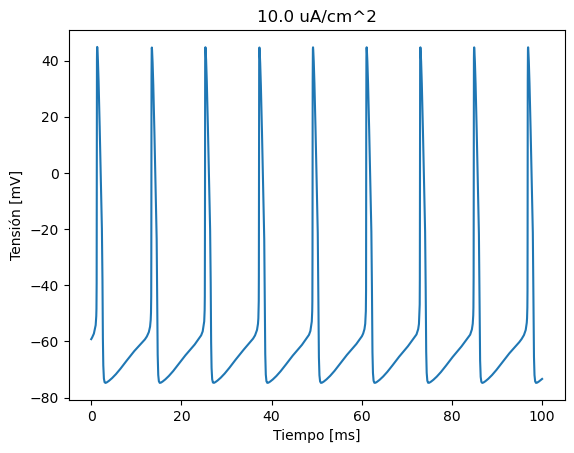

C:\Users\gatoa\AppData\Local\Temp\ipykernel_3496\3397119758.py:32: RuntimeWarning: overflow encountered in double_scalars
  b_m = 4*np.exp((-v-65)/18)


i = 20.0


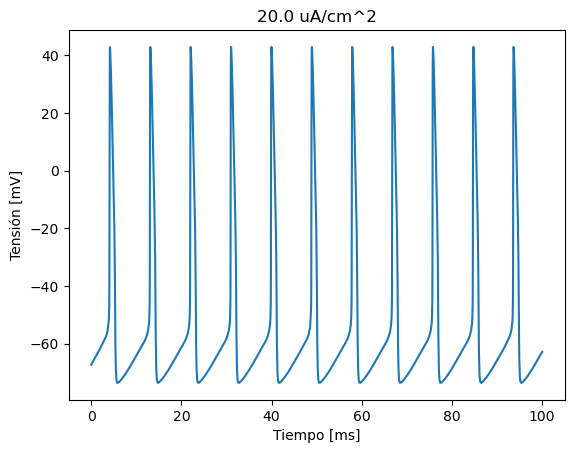

i = 30.0


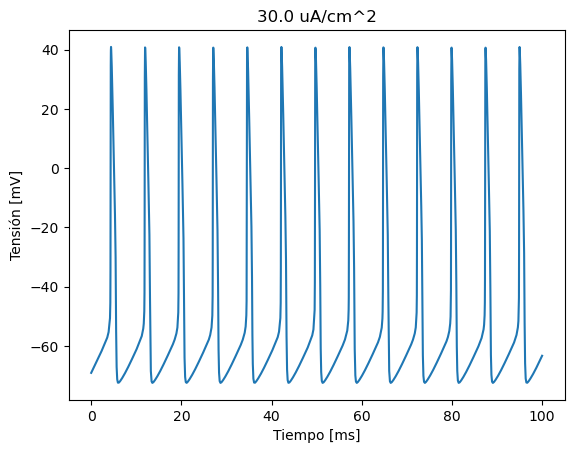

i = 40.0


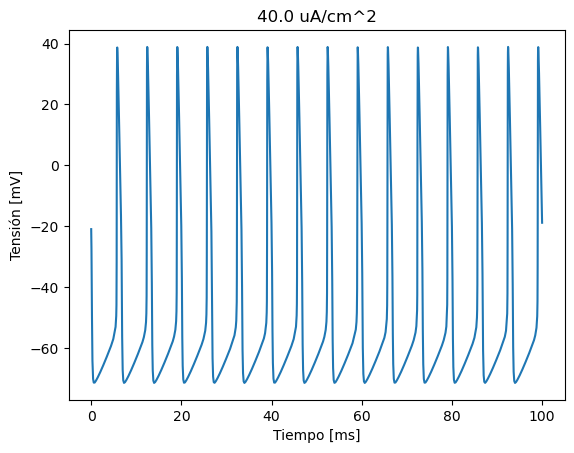

i = 50.0


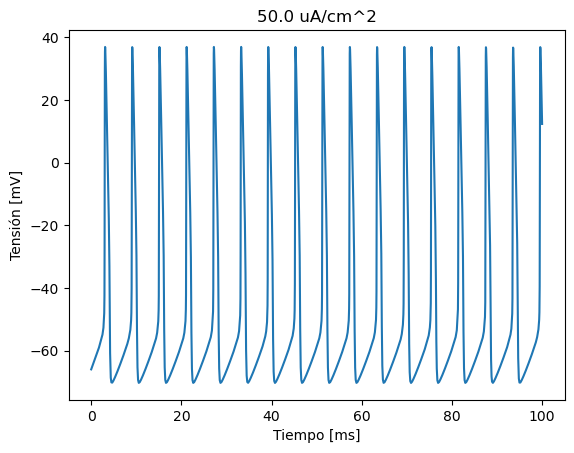

In [37]:
for j in range(K):
    result = solve_ivp(lambda t, u: derivada(t, u, I1[j]), [t_ini, t_fin], [v0, n0])

    #Resultados de la solución numérica
    t = result.t
    v = result.y[0]
    n = result.y[1]


    #Actualizo la semilla para la próxima simulación
    v0 = v[-1]
    n0 = n[-1]

    '''
    Graficar v(t) para algunos valores de corriente
    '''
    if(j%20 == 0):
        print("i = " + str(I1[j]))
        plt.plot(t, v)
        plt.title(str(I1[j]) + " uA/cm^2")
        plt.xlabel("Tiempo [ms]")
        plt.ylabel("Tensión [mV]")
        plt.show()


    max = find_peaks(v, height=-30)[0] #Indice de los máximos obtenidos (me fijo que sean mayores a 0 mV)

    if(len(max) < 2):
        f1[j] = 0
        continue

    T = 0
    for k in range(len(max) - 1):
        T += t[max[k+1]] - t[max[k]]
    
    T = T/(len(max)-1) #[ms]

    f1[j] = 1000/T #[Hz]

### Solución numérica: corriente decreciente

i = 50.0


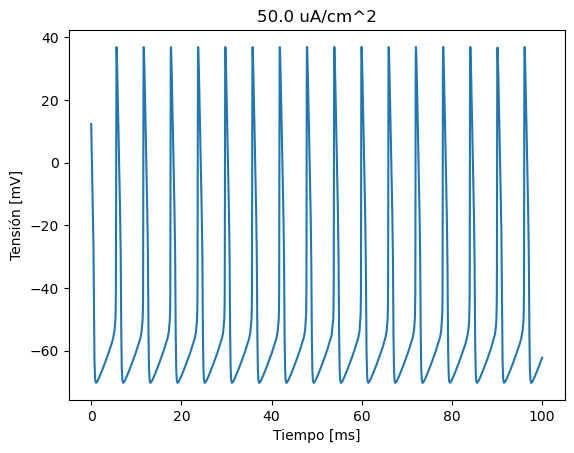

C:\Users\gatoa\AppData\Local\Temp\ipykernel_3496\3397119758.py:31: RuntimeWarning: overflow encountered in exp
  a_m = 0.1*(v+40)/(1-np.exp((-v-40)/10))
C:\Users\gatoa\AppData\Local\Temp\ipykernel_3496\3397119758.py:44: RuntimeWarning: overflow encountered in exp
  a_n = 0.01*(v+55)/(1-np.exp((-v-55)/10))
C:\Users\gatoa\AppData\Local\Temp\ipykernel_3496\3397119758.py:32: RuntimeWarning: overflow encountered in exp
  b_m = 4*np.exp((-v-65)/18)
C:\Users\gatoa\AppData\Local\Temp\ipykernel_3496\3397119758.py:45: RuntimeWarning: overflow encountered in exp
  b_n = 0.125*np.exp((-v-65)/80)
C:\Users\gatoa\AppData\Local\Temp\ipykernel_3496\3397119758.py:48: RuntimeWarning: divide by zero encountered in double_scalars
  dn = (inf_n - n)/tau_n
C:\Users\gatoa\AppData\Local\Temp\ipykernel_3496\3397119758.py:32: RuntimeWarning: overflow encountered in double_scalars
  b_m = 4*np.exp((-v-65)/18)


i = 40.0


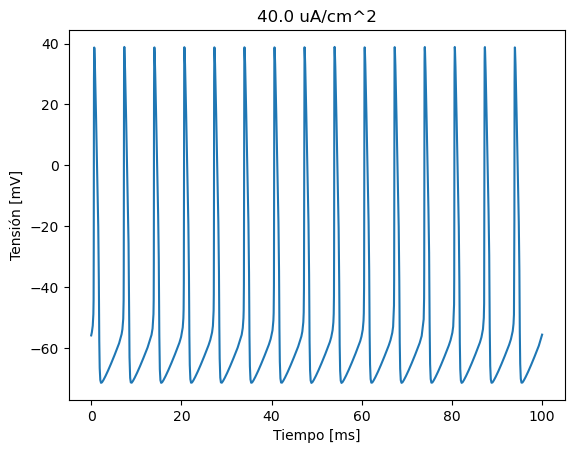

i = 30.0


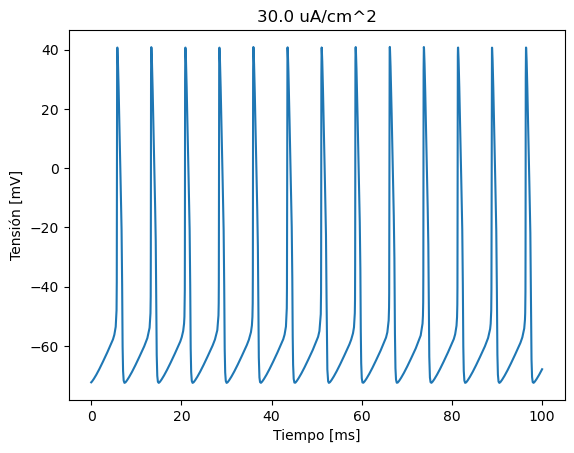

i = 20.0


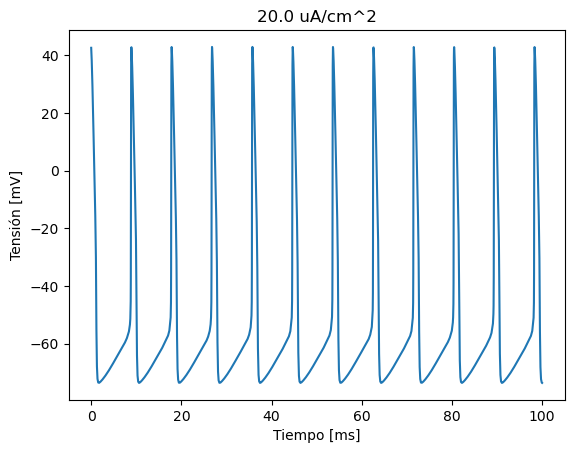

i = 10.0


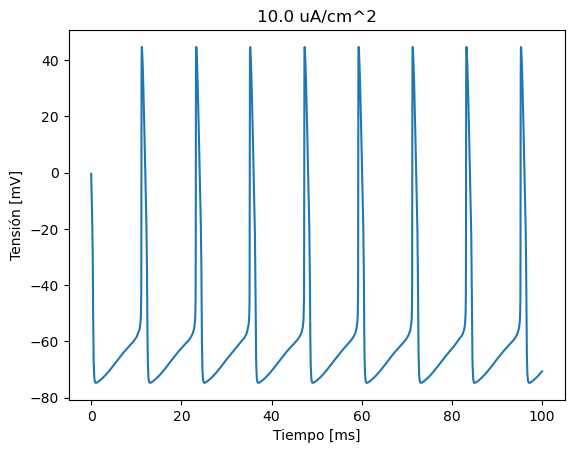

i = 0.0


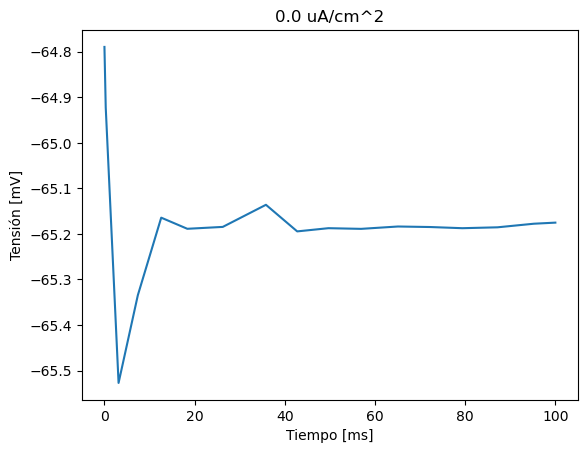

In [38]:
I2 = np.flip(I1)

for j in range(K):
    result = solve_ivp(lambda t, u: derivada(t, u, I2[j]), [t_ini, t_fin], [v0, n0])

    #Resultados de la solución numérica
    t = result.t
    v = result.y[0]
    n = result.y[1]

    #Actualizo la semilla para la próxima simulación
    v0 = v[-1]
    n0 = n[-1]

    '''
    Graficar v(t) para algunos valores de corriente
    '''
    if(j%20 == 0):
        print("i = " + str(I2[j]))
        plt.plot(t, v)
        plt.title(str(I2[j]) + " uA/cm^2")
        plt.xlabel("Tiempo [ms]")
        plt.ylabel("Tensión [mV]")
        plt.show()



    max = find_peaks(v, height=-30)[0] #Indice de los máximos obtenidos (me fijo que sean mayores a 0 mV)

    if(len(max) < 2):
        f2[j] = 0
        continue

    T = 0
    for k in range(len(max) - 1):
        T += t[max[k+1]] - t[max[k]]
    
    T = T/(len(max)-1) #[ms]

    f2[j] = 1000/T #[Hz]  


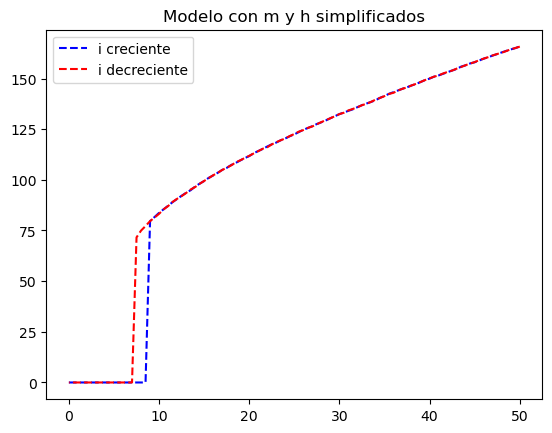

In [39]:
plt.plot(I1, f1, ls = '--', color = 'b', label = "i creciente")
plt.plot(I2, f2, ls = '--', color = 'r', label = "i decreciente")
plt.title("Modelo con m y h simplificados")
plt.legend()
plt.show()